# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [23]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [ ]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [ ]:
rm *.csv

In [ ]:
cd ..

In [ ]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

In [ ]:
cd data-processed

In [ ]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R

In [ ]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, mypwd[0])

In [ ]:
os.chdir(mypwd[0])

files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(gitdir + '/' + 'Data/')        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

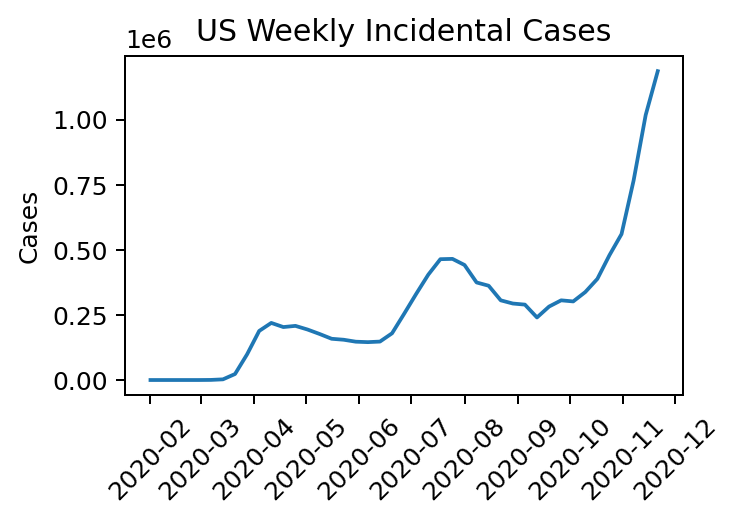

In [7]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [8]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')
FirstForecasts.to_pickle('../Data/ModelsANDForecasts.pkl')

100%|██████████| 2877/2877 [07:58<00:00,  6.02it/s]


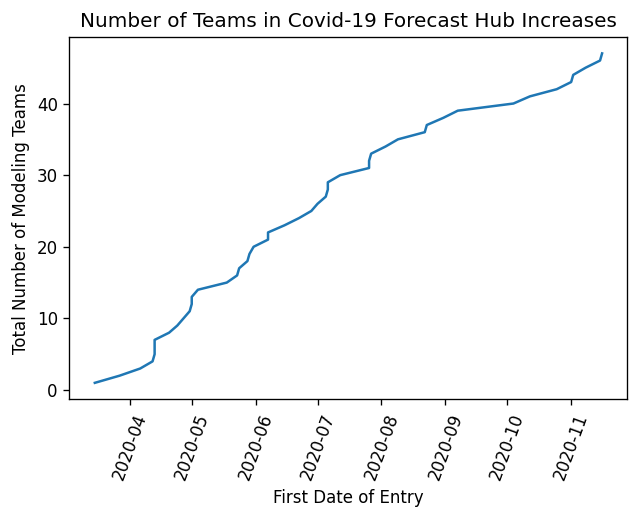

In [7]:
FirstForecasts = pd.read_pickle('../Data/ModelsANDForecasts.pkl')
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
5.100556999891981
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. UCLA:SuEIR
3. Covid19Sim:Simulator
4. JHU_IDD:CovidSP
5. IowaStateLW:STEM
6. OliverWyman:Navigator
7. Columbia_UNC:SurvCon
8. CovidAnalytics:DELPHI
9. UMich:RidgeTfReg
10. USACE:ERDC_SEIR
11. RobertWalraven:ESG
12. QJHong:Encounter
13. LNQ:ens1
14. IHME:CurveFit
15. COVIDhub:ensemble
16. Karlen:pypm
17. DDS:NBDS
18. CU:nochange
19. CU:scenario_high
20. CU:scenario_low
21. CU:select
22. CU:scenario_mid
23. CEID:Walk
24. JHUAPL:Bucky
25. BPagano:RtDriven
26. JHU_CSSE:DECOM
27. USC:SI_kJalpha_RF
28. JCB:PRM
29. UChicagoCHATTOPADHYAY:UnIT
30. UCF:AEM
31. USC:SI_kJalpha
32. UVA:Ensemble
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


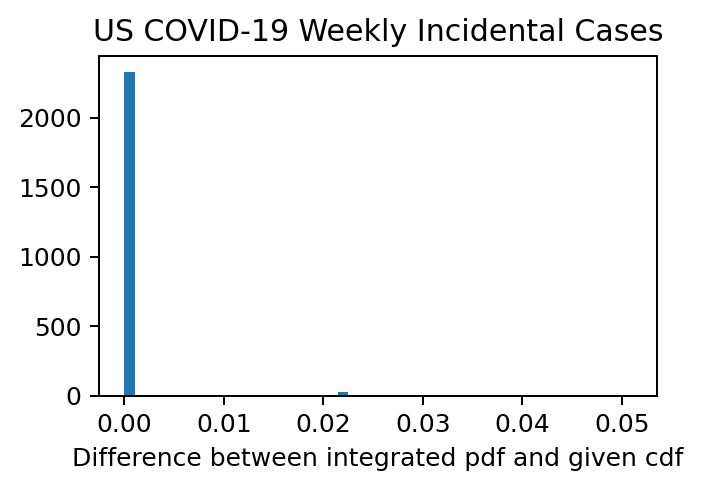

In [8]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [9]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [10]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [10]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)

<Figure size 1800x1200 with 0 Axes>

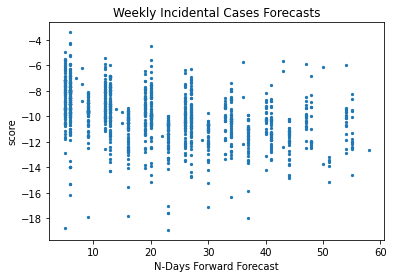

<Figure size 1800x1200 with 0 Axes>

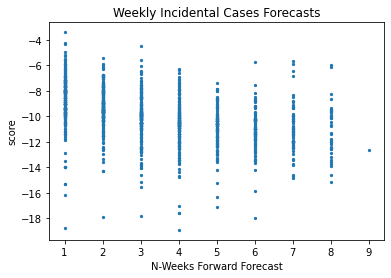

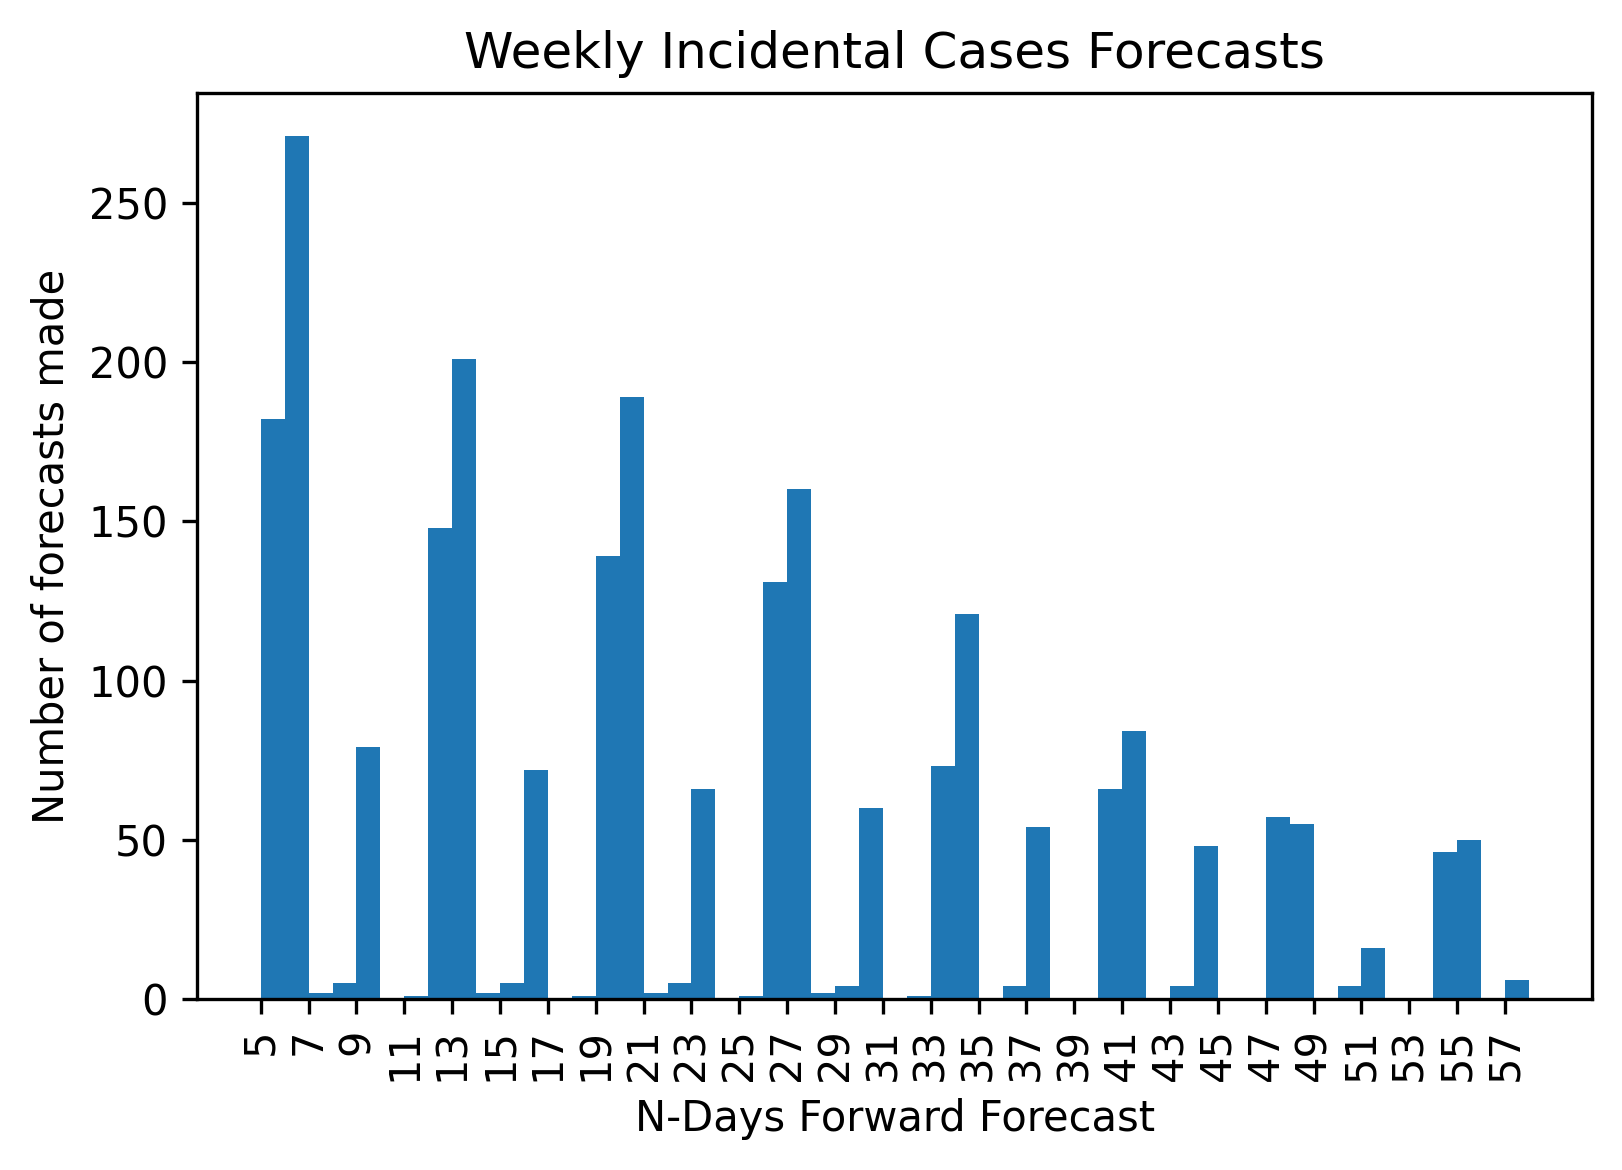

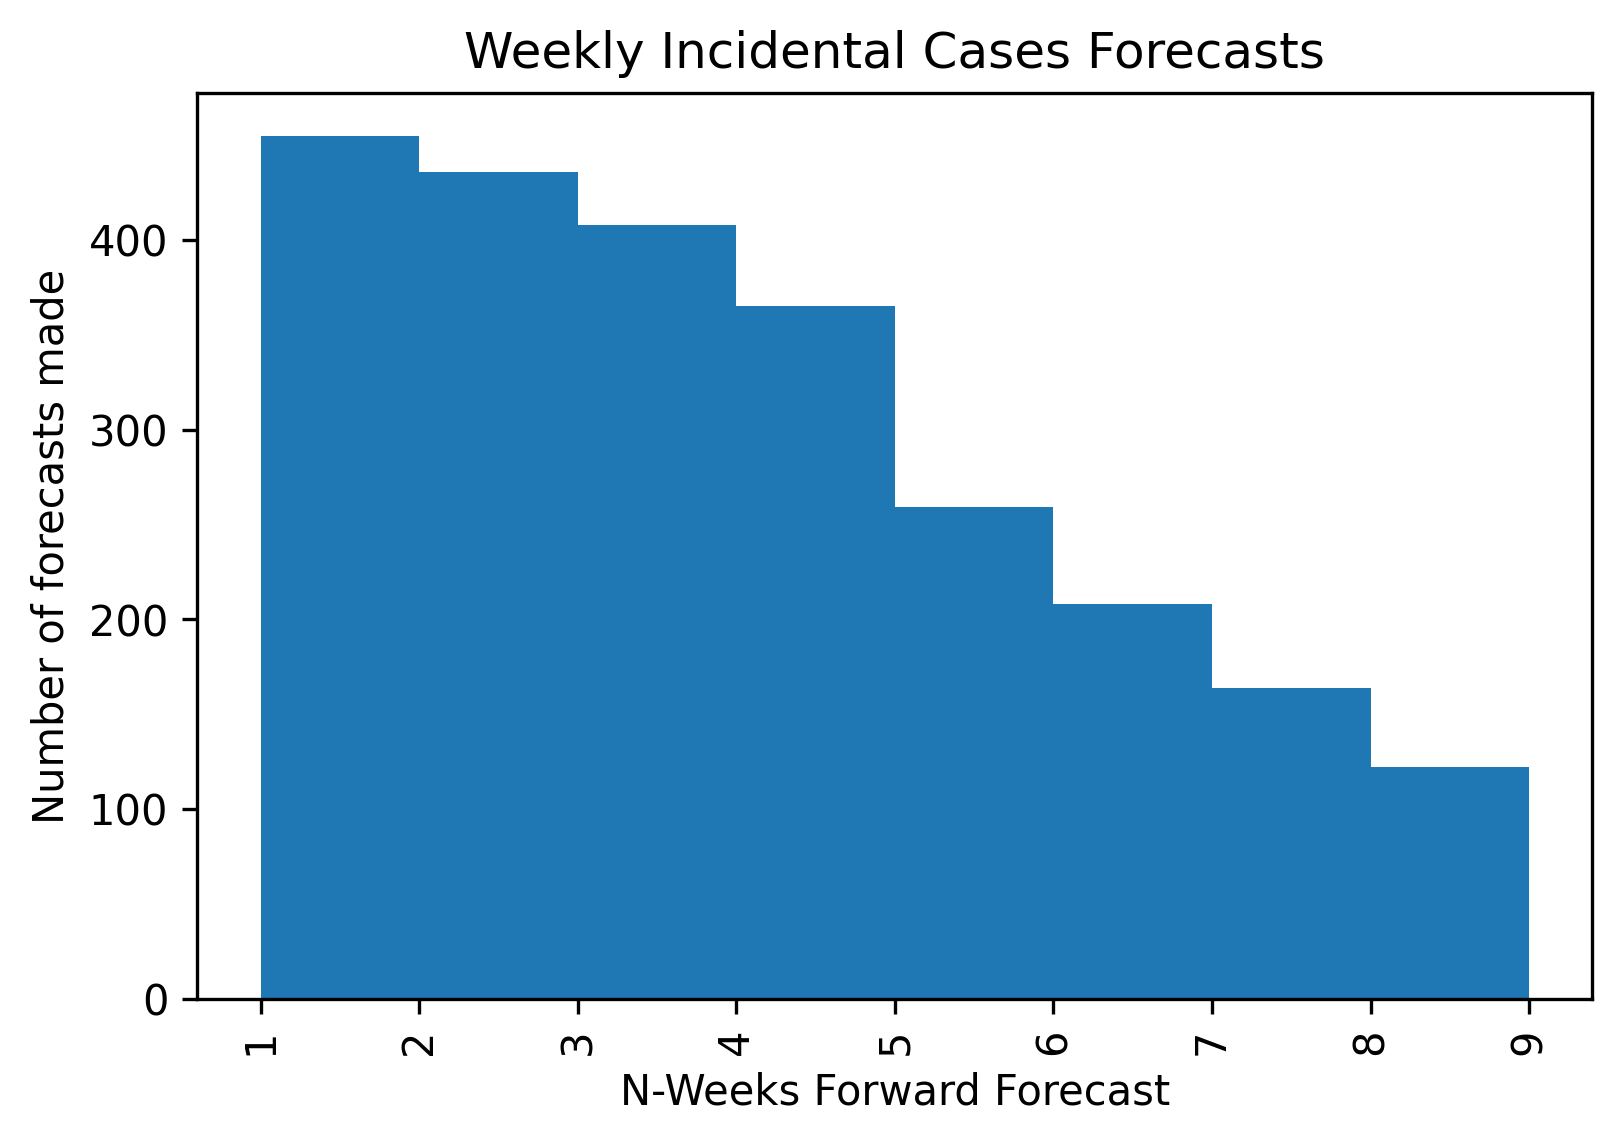

In [8]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [ ]:
int(ScoreboardCases['deltaW'].max())

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [ ]:
#ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven']

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

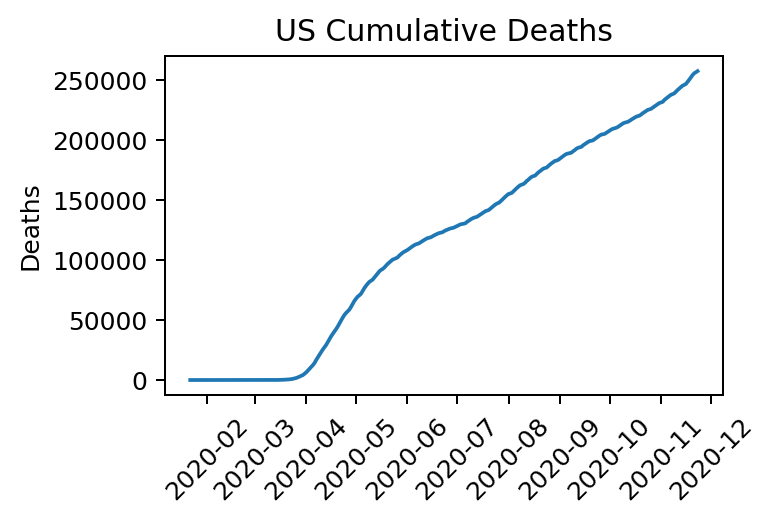

In [11]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [ ]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

In [ ]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
2.5793983820063593
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. IHME:CurveFit
3. COVIDhub:baseline
4. CU:select
5. CU:scenario_mid
6. CU:scenario_low
7. CU:scenario_high
8. CU:nochange
9. COVIDhub:ensemble
10. MOBS:GLEAM_COVID
11. UMass:ExpertCrowd
12. YYG:ParamSearch
13. UT:Mobility
14. JHU_IDD:CovidSP
15. LANL:GrowthRate
16. CovidAnalytics:DELPHI
17. IowaStateLW:STEM
18. UCLA:SuEIR
19. GT:DeepCOVID
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. OliverWyman:Navigator
28. CovidActNow:SEIR_CAN
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. QJHong:Encounter
33. Columbia_UNC:SurvCon
34. UMich:RidgeTfReg
35. RobertWalraven:ESG
36. UCM_MESALab:FoGSEIR
37. Karlen:pypm
38. DDS:NBDS
39. RPI_UW:Mob_Collision
40. CEID:Walk
41. LNQ:ens1
42. WalmartLabsML:LogForecasting
43. SteveMcConnell:CovidComplete
44. JHUAPL:Bucky
4

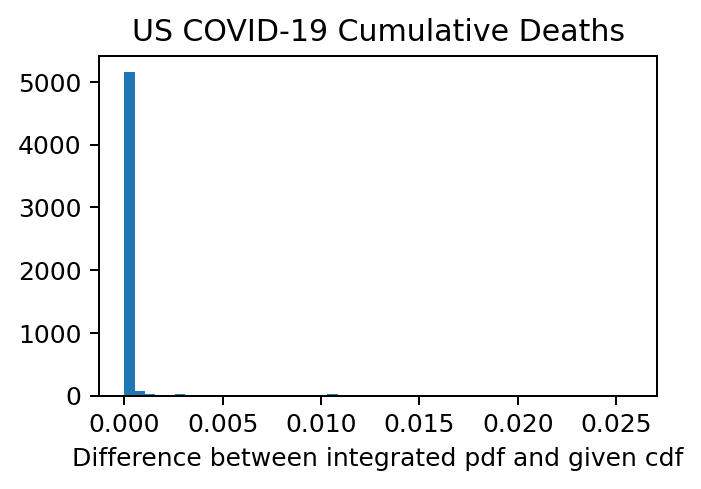

In [12]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [12]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [13]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [13]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)

In [15]:
ScoreboardDeaths.head(3)

,model,forecast_date,delta,target_end_date,quantile,value,deaths,deltaW,proper,score,sumpdf,prange,p,CIHI,CILO,PE,scorecontr
0,Imperial:ensemble2,2020-03-15,6,2020-03-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[98.0, 109.0, 120.0, 134.0, 145.0, 154.0, 163....",464,1.0,True,-7.863772,0.979483,0.98,0.000220,561.0,98.0,203.0,51.003074
1,Imperial:ensemble1,2020-03-15,6,2020-03-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[77.0, 85.0, 94.0, 109.0, 123.0, 137.0, 149.0,...",464,1.0,True,-7.513923,0.979197,0.98,0.000262,523.0,77.0,203.0,42.818134
2,Imperial:ensemble2,2020-03-22,6,2020-03-28,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[1640.0, 1733.0, 1819.0, 1926.0, 1999.0, 2062....",2886,1.0,True,-4.983852,0.979924,0.98,0.000373,4037.0,1640.0,2380.0,12.084531


In [13]:
ScoreboardDeaths['deaths']

0          464
1          464
2         2891
3         2891
4        10892
         ...  
5120    255861
5121    255861
5122    255861
5123    255861
5124    255861
Name: deaths, Length: 5125, dtype: int64

In [9]:
ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven'].tail(3)

,model,forecast_date,delta,target_end_date,quantile,value,deaths,deltaW,proper,score,sumpdf,prange,p,CIHI,CILO,PE,scorecontr
5356,BPagano:RtDriven,2020-11-08,13,2020-11-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[246599.67521999998, 247756.84866, 248791.3007...",255861,2.0,True,-2.998973,0.979986,0.98,0.000107,262037.73501,246599.67522,254318.70512,4.479389
5359,BPagano:RtDriven,2020-11-08,6,2020-11-14,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[241659.07149, 242191.21074, 242666.91519, 243...",245591,1.0,True,-1.347653,0.979969,0.98,0.000249,248758.43725,241659.07149,245208.75437,1.961729
5443,BPagano:RtDriven,2020-11-15,6,2020-11-21,"[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,...","[249915.02874, 250541.25048000002, 251101.0597...",255861,1.0,True,-2.494590,0.979974,0.98,0.000137,258269.56606,249915.02874,254092.29740,3.480914


In [27]:
ScoreboardDeaths.index[ScoreboardDeaths['model'] == 'BPagano:RtDriven'].tolist()

[4103, 4117, 4124, 4132, 4143, 4263, 4284, 4292, 4320, 4427, 4458, 4542, 4610]

BPagano:RtDriven


(array([241660., 241661., 241662., ..., 248754., 248755., 248756.]),
 array([1.54367034e-05, 1.54844412e-05, 1.55480331e-05, ...,
        1.55420304e-05, 1.54781131e-05, 1.54301309e-05]),
 0.9799693125256048,
 0.98)

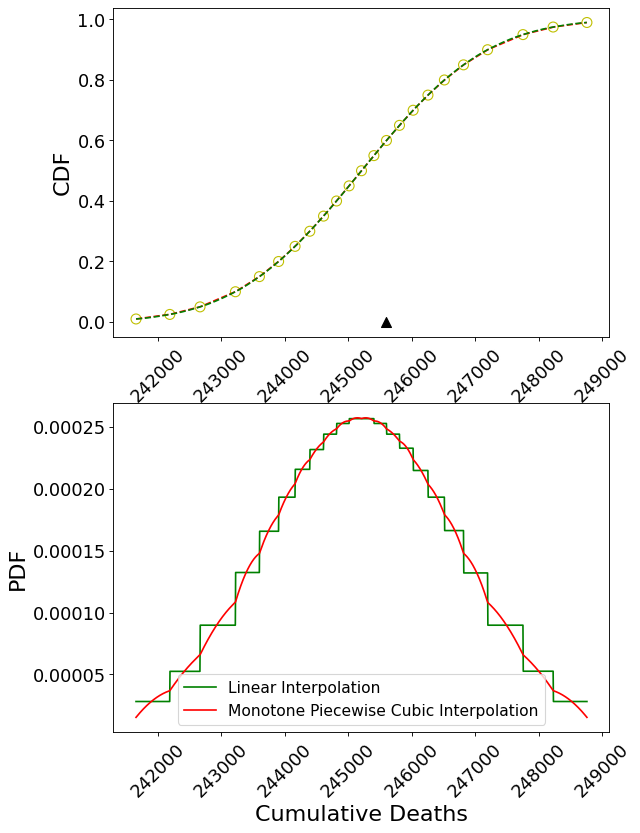

In [8]:
S19.cdfpdf(ScoreboardDeaths,5359,1,True,figuresdirectory)

(737430.7, 737767.3)

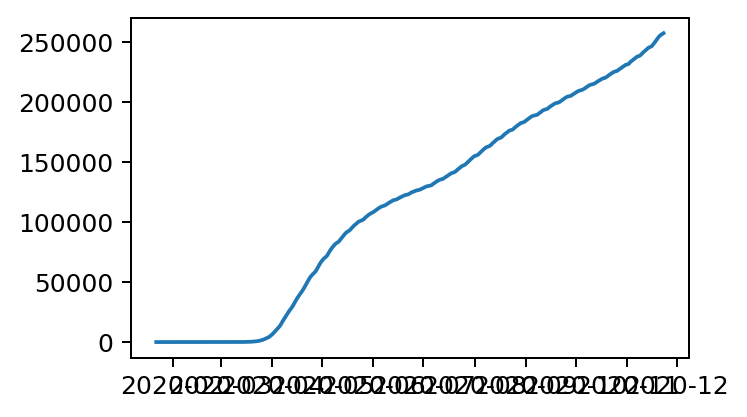

In [18]:
plt.figure(figsize=(4, 2.5), dpi=180, facecolor='w', edgecolor='k')
plt.plot(US_deaths.DateObserved,US_deaths.Deaths)
lims = plt.gca().get_xlim()
plt.gca().set_xlim(xmin=lims[0], xmax=lims[1])


(0.0, 1.0)

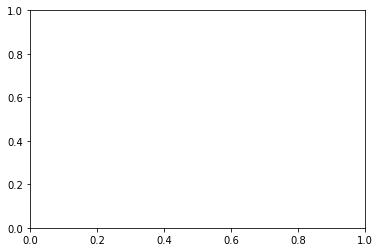

In [19]:
len(ScoreboardDeaths['model'].unique())

50

<Figure size 1800x1200 with 0 Axes>

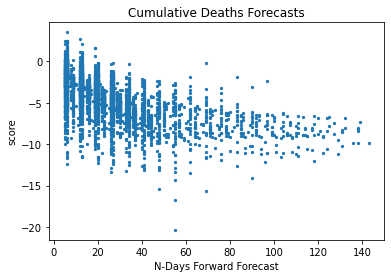

<Figure size 1800x1200 with 0 Axes>

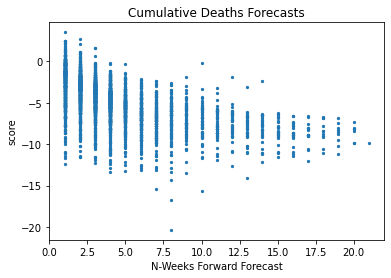

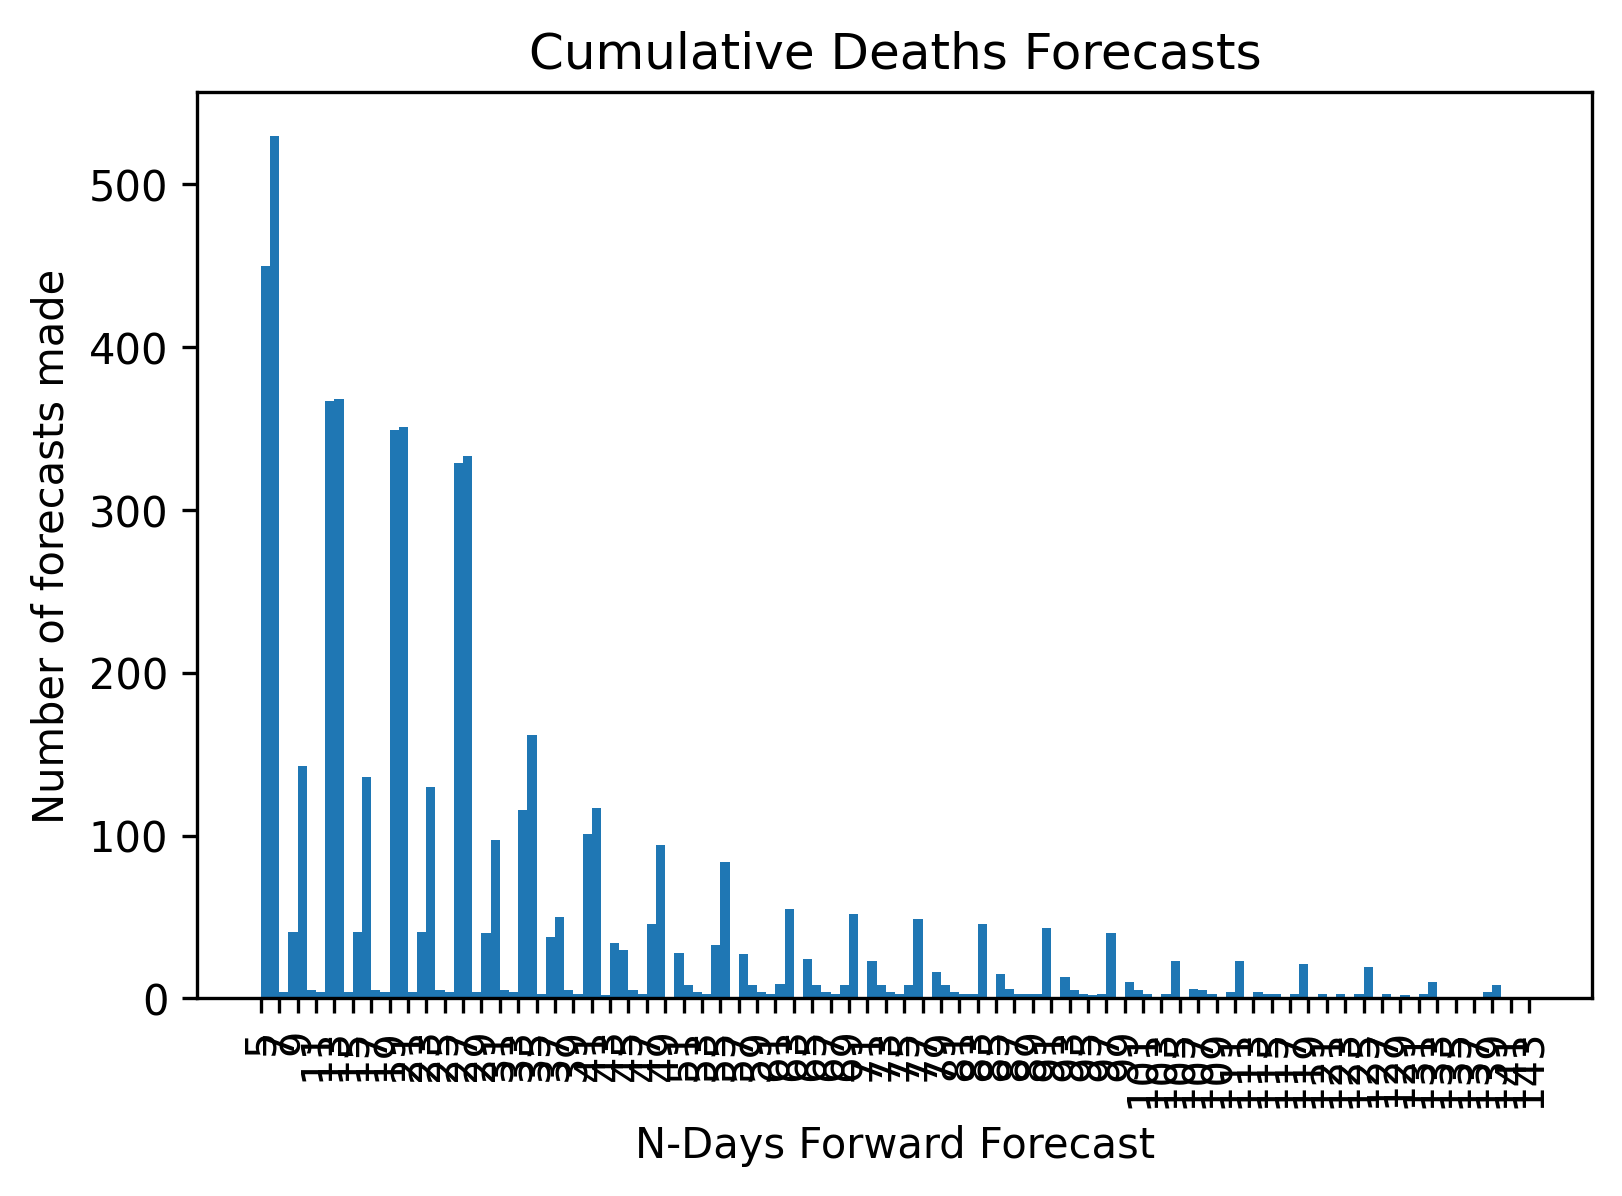

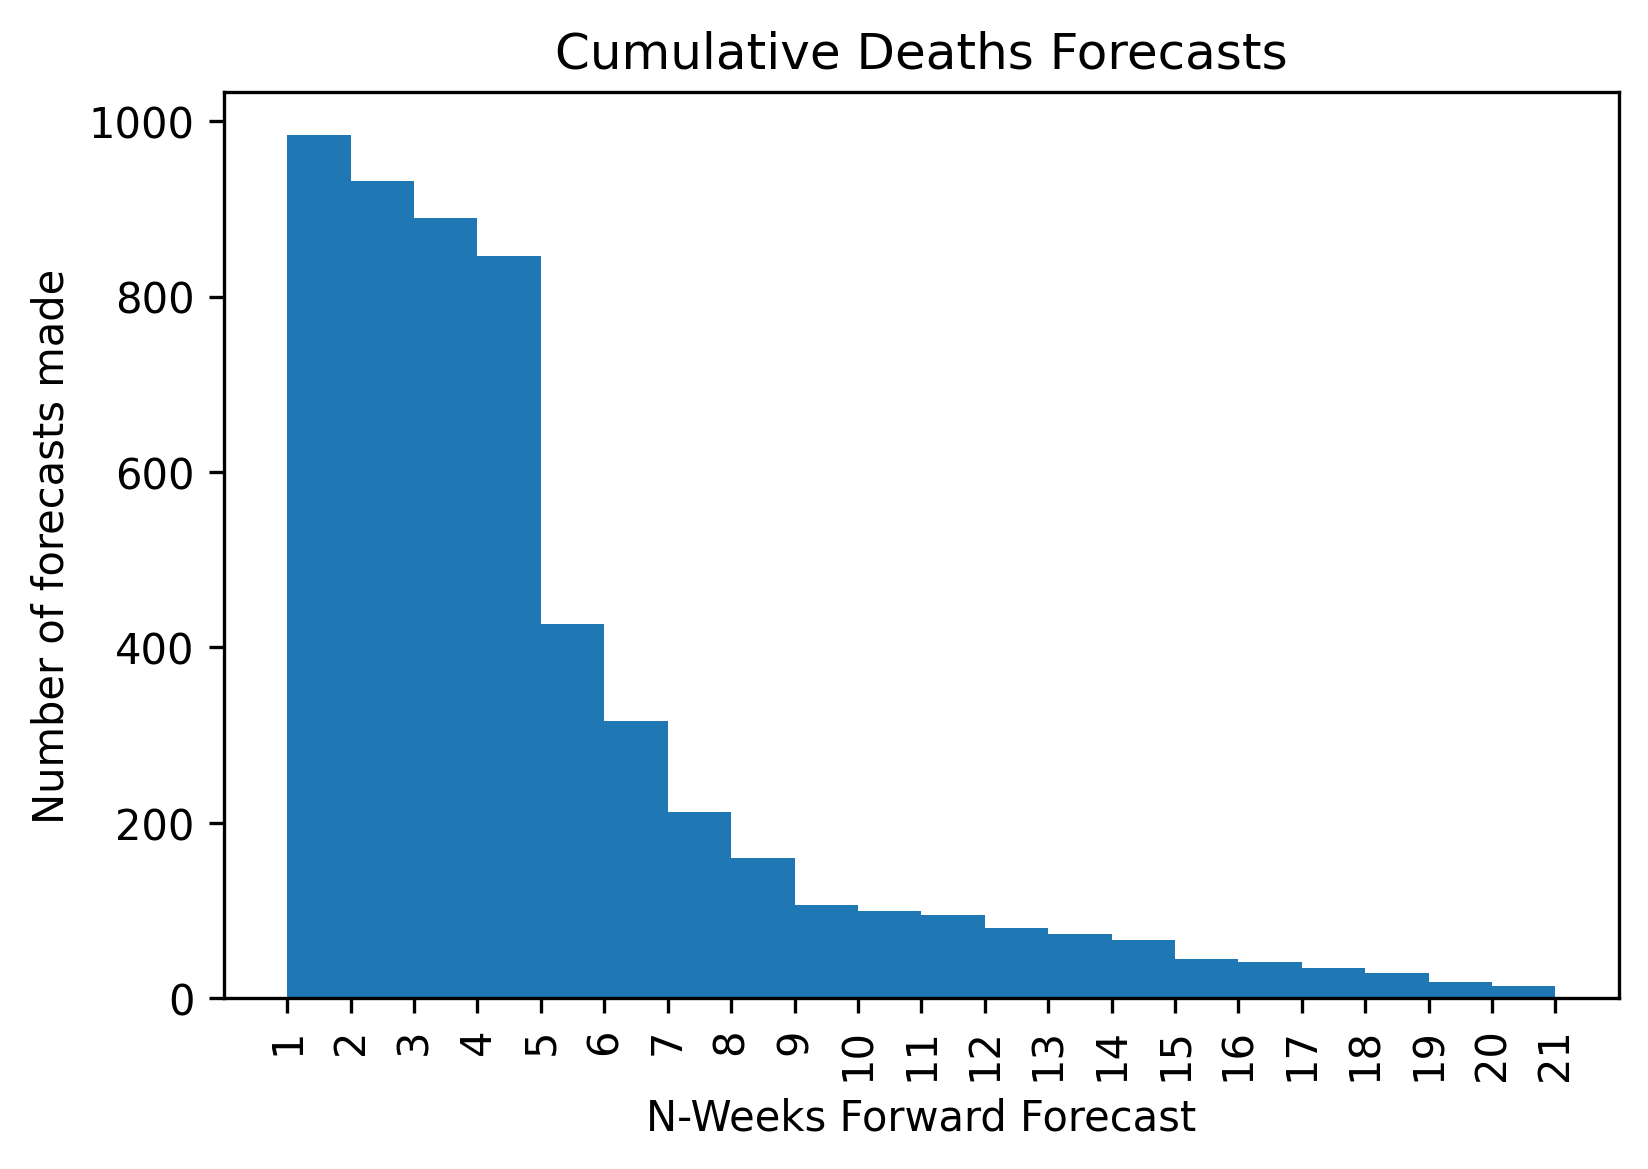

In [10]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# Get weighted and unweighted model forecasts

In [ ]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

# UNWEIGHTED FORECASTING

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))


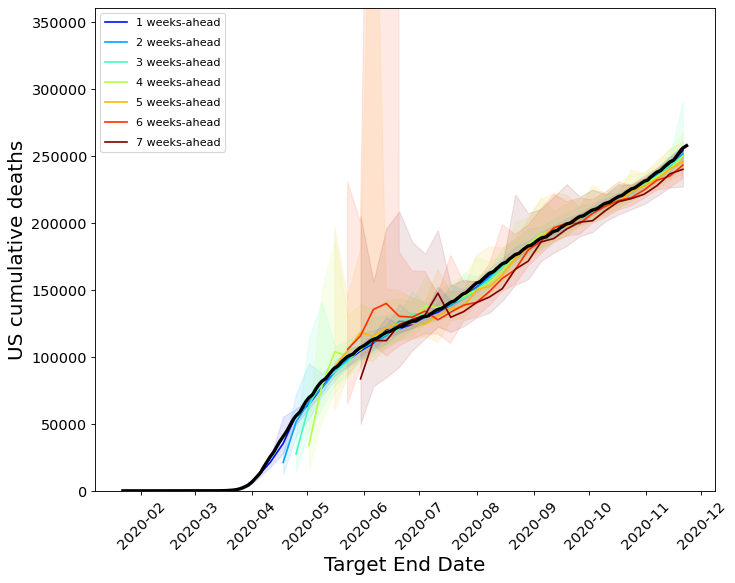

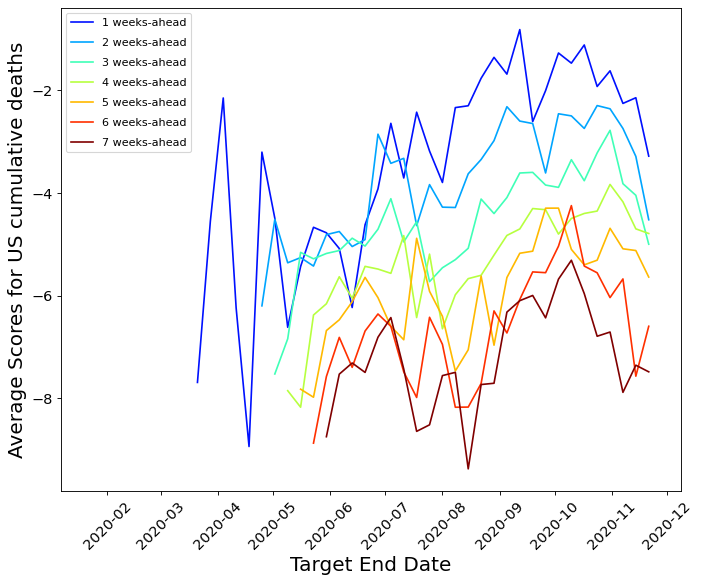

In [14]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7,figuresdirectory)

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:276: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19

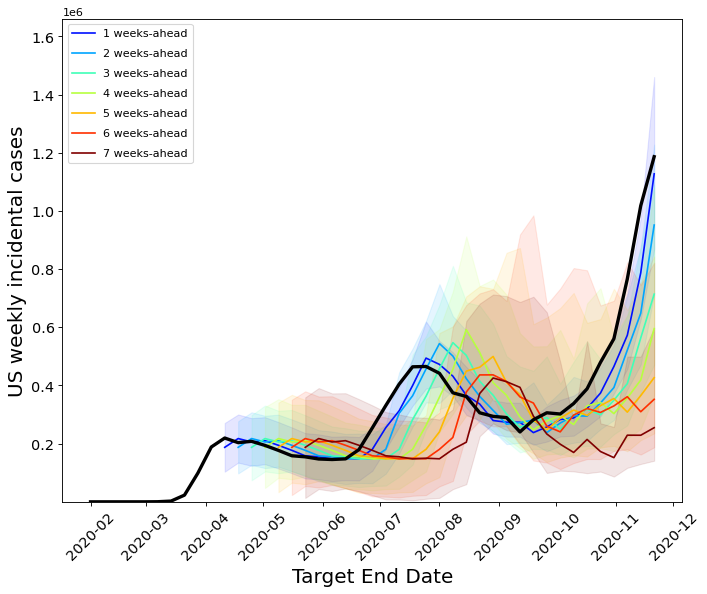

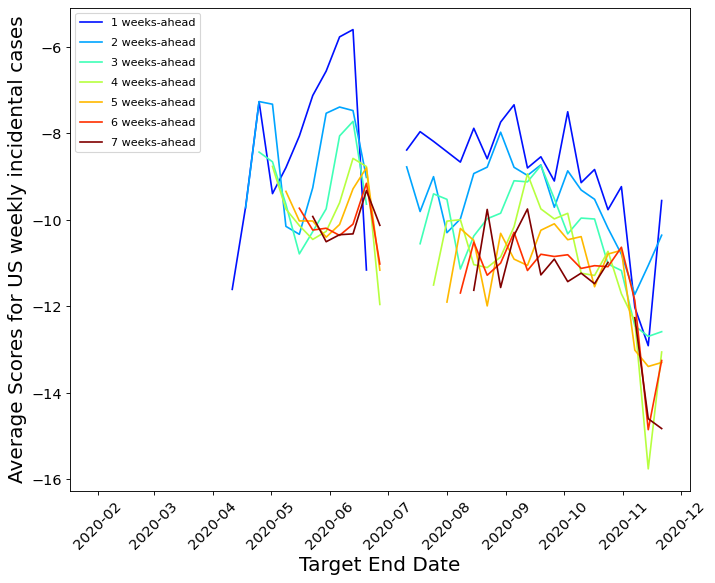

In [15]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7,figuresdirectory)

# SCORE-WEIGHTED FORECASTING

## Deaths

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight')

## Cases

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight')

# ANALYSIS OF SCORES

## Plots by date forecast made

In [ ]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

In [ ]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

In [ ]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

In [ ]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])

In [16]:
#Read Observed Cases
address = 'https://raw.githubusercontent.com/reichlab/covid19-forecast-hub/master/data-truth/truth-Cumulative%20Cases.csv'
dfOBS = pd.read_csv(address,
                    dtype = {'location': str},parse_dates=['date'],
                    na_values = ['NA', 'no info', '.'])
US_cases = dfOBS.copy()    
US_cases = US_cases[(dfOBS['location_name'] == 'US')]
US_cases = US_cases.drop(columns=['location', 'location_name'])
US_cases.columns = ['DateObserved', 'Cases']
US_cases.reset_index(inplace=True,drop=True)

#Convert from daily to  weekly measured from Sun-Sat
WeeklyUS_cases = US_cases.iloc[np.arange(US_cases[US_cases["DateObserved"]=="2020-01-25"].index[0],
                                         len(US_cases),7)].copy()
WeeklyUS_cases['Cases'] = WeeklyUS_cases.Cases.diff()
WeeklyUS_cases.reset_index(drop=True, inplace=True)

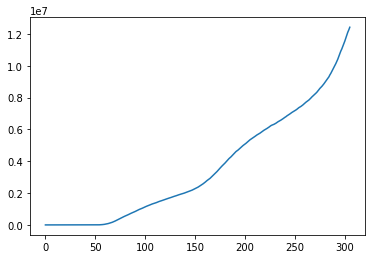

In [24]:
plt.plot(US_cases['Cases'])

In [20]:
US_cases.head(18)

,DateObserved,Cases
0,2020-01-23,1
1,2020-01-24,2
2,2020-01-25,2
3,2020-01-26,5
4,2020-01-27,5
5,2020-01-28,5
6,2020-01-29,6
7,2020-01-30,6
8,2020-01-31,8
9,2020-02-01,8


In [19]:
WeeklyUS_cases.head(3)

,DateObserved,Cases
0,2020-01-25,NaN
1,2020-02-01,6.0
2,2020-02-08,4.0


In [25]:
temp = US_cases.iloc[np.arange(US_cases[US_cases["DateObserved"]=="2020-01-25"].index[0],
                                         len(US_cases),7)].copy()
temp

,DateObserved,Cases
2,2020-01-25,2
9,2020-02-01,8
16,2020-02-08,12
23,2020-02-15,14
30,2020-02-22,16
37,2020-02-29,25
44,2020-03-07,403
51,2020-03-14,2986
58,2020-03-21,26043
65,2020-03-28,124900


In [26]:
dfPREDx = pd.read_csv('../Data/all_dataONY.csv',
                     na_values = ['NA', 'no info', '.'], parse_dates=True)
dfPREDx.drop_duplicates(subset=None, keep = 'first', inplace = True)

In [33]:
np.sort(dfPREDx['team'].unique())

array(['Auquan', 'BPagano', 'CEID', 'COVIDhub', 'CU', 'Columbia_UNC',
       'Covid19Sim', 'CovidActNow', 'CovidAnalytics', 'DDS', 'GT', 'IHME',
       'Imperial', 'IowaStateLW', 'JCB', 'JHUAPL', 'JHU_CSSE', 'JHU_IDD',
       'Karlen', 'LANL', 'LNQ', 'MITCovAlliance', 'MOBS', 'MSRA',
       'NotreDame', 'OliverWyman', 'PSI', 'QJHong', 'RPI_UW',
       'RobertWalraven', 'SWC', 'SteveMcConnell', 'UA', 'UCF', 'UCLA',
       'UCM_MESALab', 'UCSD_NEU', 'UChicagoCHATTOPADHYAY', 'UMass',
       'UMich', 'USACE', 'USC', 'UT', 'UVA', 'WalmartLabsML', 'YYG',
       'epiforecasts'], dtype=object)